# Assignment 2


#  Data pre-processing


In [1]:
import pandas as pd
import numpy as np

data_file = 'data.csv'
data_df = pd.read_csv(data_file, sep=',')
data_df.head(15)
col_names = ['age', 'income','student' ,'credit_rating','class_buys_computer'] #to 

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(dtype=int) #have to make `dtype=int` because otherwise there is a comma
data_df_ord_enc = ord_enc.fit_transform(data_df[col_names])

# data_df_ord_enc   # testing to see how it looks


# Splitting testing and training set

In [2]:
y = data_df_ord_enc[0:,-1]   # 0: class_buys_computer = no, 1: class_buys_computer = yes
x = data_df_ord_enc[0:,0:-1]
# age: [0,1,2] = [middle_aged,senior,youth]
# income: [0,1,2] = [high,low,medium]
# studnent: [0,1] = [no,yes]
# credit_rating [0,1] = [excellent,fair]

# splitting data
x_train , x_test = x[4:,:] , x[0:4,:]
y_train , y_test = y[4:] , y[0:4]


# **Q1 (a)**






Information Gain Tree with default setting: min_samples_split=2, criterion=entropy
max_depth=4, number of leaves = 6
The Train score is: 100.0%
The Test Score is: 75.0%


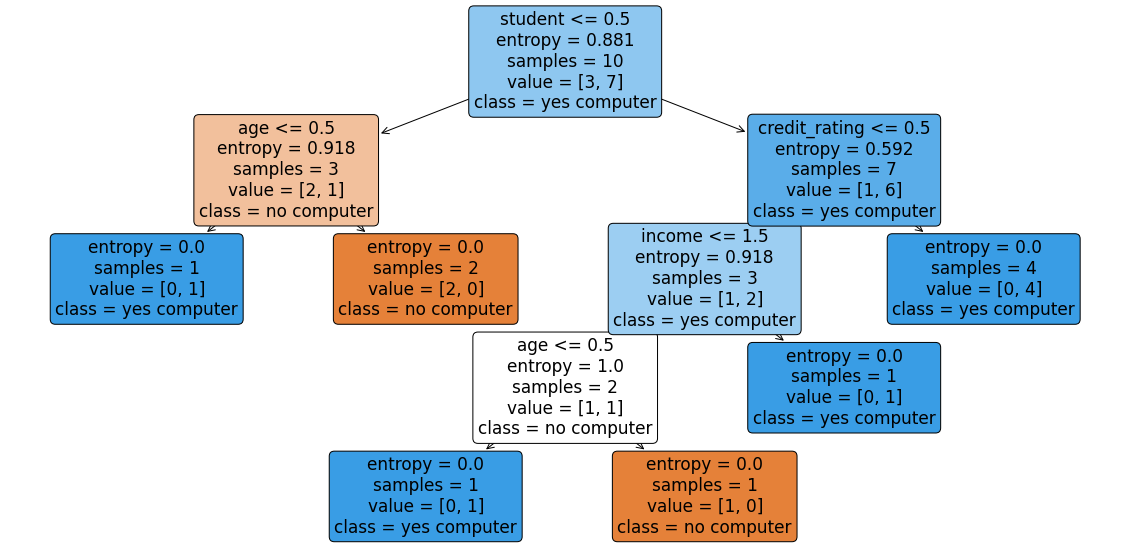

In [3]:
#making decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2, random_state=1)
clf = clf.fit(x_train, y_train)
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(x_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(x_test))

#plot the tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # increase fig size
tree.plot_tree(clf,feature_names=col_names[:4],filled=True, rounded=True, class_names=["no computer","yes computer"])
print(f"\n\n") 
print(f"Information Gain Tree with default setting: min_samples_split=2, criterion=entropy")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
print("The Train score is: {}%\nThe Test Score is: {}%".format(train_score*100,test_score*100))
plt.show()

# **Q1 (b)**





Information Gain Tree with default setting: min_samples_split=2, criterion=entropy
max_depth=4, number of leaves = 7
The Train score is: 100.0%
The Test Score is: 50.0%


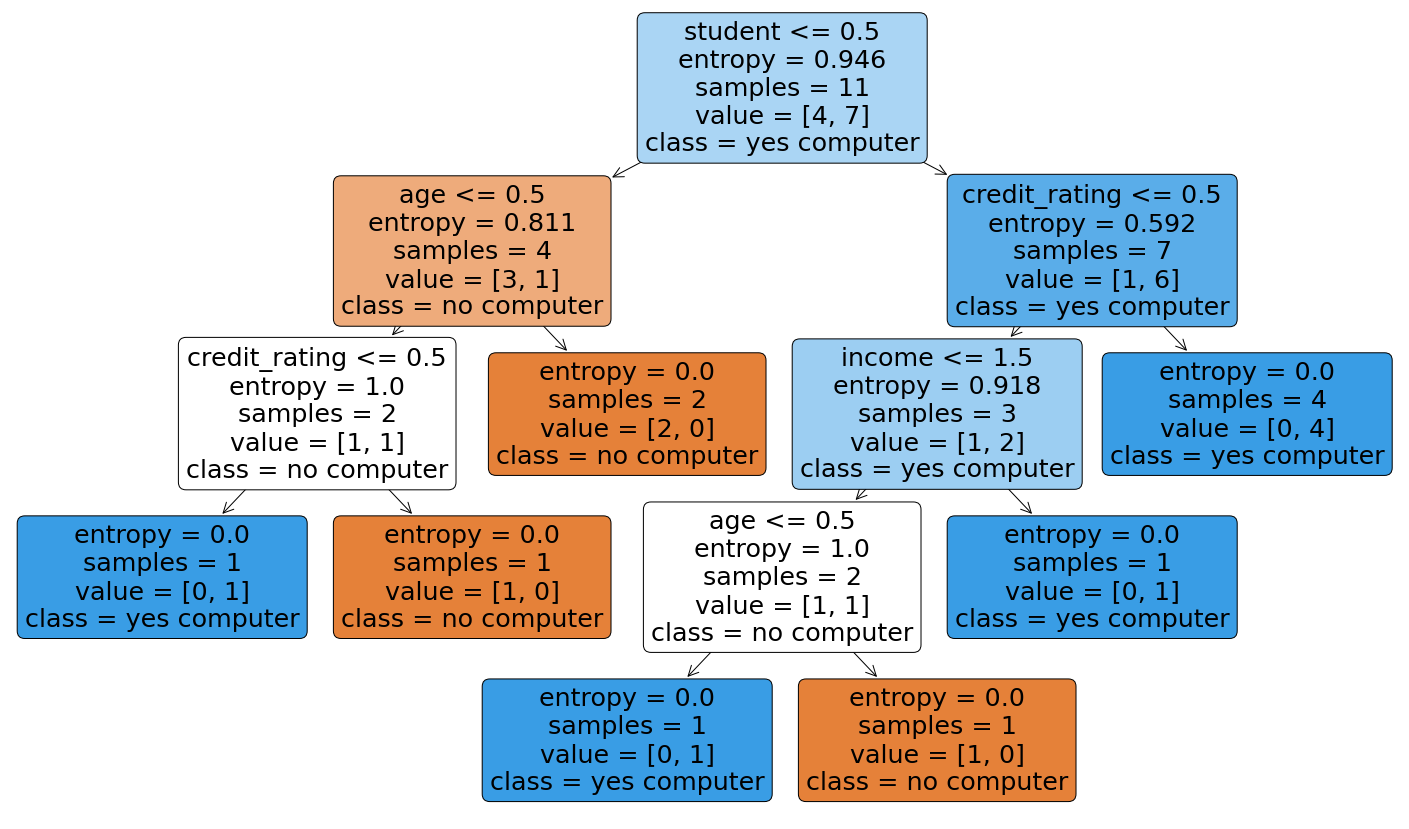

In [4]:
#adding extra data as noise

extra_data_x = [[0,1,0,1]]
extra_data_y = [0]

extra_x_train = np.append(x_train,extra_data_x,axis=0)
extra_y_train = np.append(y_train,extra_data_y)

extra_clf = clf.fit(extra_x_train, extra_y_train)

#make prediction
extra_y_predict = extra_clf.predict(x_test)     #x_test is first 4 so its the same
train_score = accuracy_score(y_true=extra_y_train, y_pred=clf.predict(extra_x_train))
test_score = accuracy_score(y_true=y_test, y_pred=extra_y_predict)


#plot the tree
plt.figure(figsize=(25, 15)) # increase fig size
tree.plot_tree(extra_clf,feature_names=col_names[:4],filled=True, rounded=True, class_names=["no computer","yes computer"])
print(f"\n\n") 
print(f"Information Gain Tree with default setting: min_samples_split=2, criterion=entropy")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
print("The Train score is: {}%\nThe Test Score is: {}%".format(train_score*100,test_score*100))
plt.show()


# **Q1 (c)**




Gini Tree with default setting: min_samples_split=2, criterion=gini
max_depth=4, number of leaves = 6
The Train score is: 100.0%
The Test Score is: 75.0%


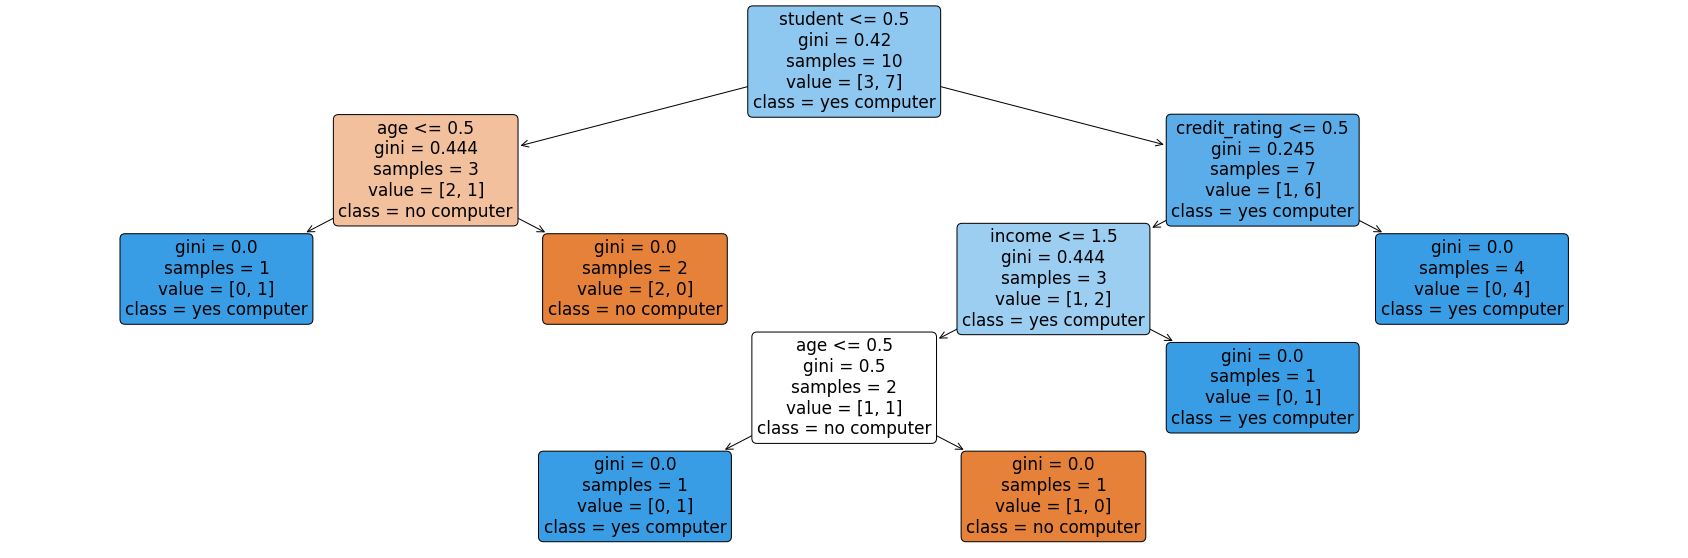

In [5]:
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2,random_state=1)
clf = clf.fit(x_train, y_train)
train_score = accuracy_score(y_true=y_train, y_pred=clf.predict(x_train))
test_score = accuracy_score(y_true=y_test, y_pred=clf.predict(x_test))

#plot the tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10)) # increase fig size
tree.plot_tree(clf,feature_names=col_names[:4],filled=True, rounded=True, class_names=["no computer","yes computer"])
print(f"\n\n") 
print(f"Gini Tree with default setting: min_samples_split=2, criterion=gini")
print(f"max_depth={clf.get_depth()}, number of leaves = {clf.get_n_leaves()}")
print("The Train score is: {}%\nThe Test Score is: {}%".format(train_score*100,test_score*100))
plt.show()

# **Q2**

In [6]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(alpha=0) # laplace correction
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_score = sum(y_train_pred == y_train) / len(y_train)
test_score = sum(y_test_pred == y_test) / len(y_test)

print("The Train score is: {:.2f}%\n The Test score is: {:.2f}%".format(train_score*100, test_score*100))


The Train score is: 90.00%
 The Test score is: 25.00%


C:\Users\kkaus\Anaconda3\envs\comp4331\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


# **Q2(b)**

In [7]:
clf = CategoricalNB(alpha=0) # laplace correction
clf.fit(extra_x_train,extra_y_train)

extra_y_train_pred = clf.predict(extra_x_train)
extra_y_test_pred = clf.predict(x_test)

extra_train_score = sum(extra_y_train_pred == extra_y_train) / len(extra_y_train)
extra_test_score = sum(y_test_pred == y_test) / len(y_test)

print("The Train score is: {:.2f}%\nThe Test score is: {:.2f}%".format(extra_train_score*100, extra_test_score*100))


The Train score is: 81.82%
The Test score is: 25.00%


C:\Users\kkaus\Anaconda3\envs\comp4331\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
